Train the Dataset with VGG 16 model

Found 475 images belonging to 3 classes.
Found 475 images belonging to 3 classes.
Found 475 images belonging to 3 classes.
Epoch 1/40
59/59 [==============================] - 186s 3s/step - loss: 1.0433 - accuracy: 0.4904 - val_loss: 0.9679 - val_accuracy: 0.7034
Epoch 2/40
59/59 [==============================] - 135s 2s/step - loss: 0.9471 - accuracy: 0.6531 - val_loss: 0.9032 - val_accuracy: 0.6165
Epoch 3/40
59/59 [==============================] - 131s 2s/step - loss: 0.8766 - accuracy: 0.6981 - val_loss: 0.8181 - val_accuracy: 0.7585
Epoch 4/40
59/59 [==============================] - 127s 2s/step - loss: 0.8248 - accuracy: 0.7281 - val_loss: 0.7643 - val_accuracy: 0.7627
Epoch 5/40
59/59 [==============================] - 124s 2s/step - loss: 0.7796 - accuracy: 0.7216 - val_loss: 0.7163 - val_accuracy: 0.7945
Epoch 6/40
59/59 [==============================] - 128s 2s/step - loss: 0.7364 - accuracy: 0.7623 - val_loss: 0.6987 - val_accuracy: 0.7225
Epoch 7/40
59/59 [=============

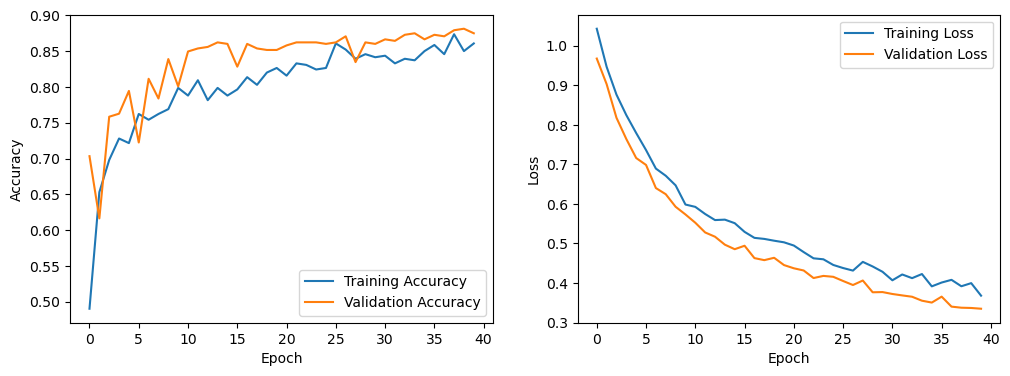

59/59 [==============================] - 68s 1s/step - loss: 0.3745 - accuracy: 0.8623
Test loss: 0.3367
Test accuracy: 87.29
Train loss: 0.3745
Train accuracy: 86.23


C:\Users\sreer\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define your data directories
train_dir = 'Dataset/'
val_dir = 'Validation/'
test_dir = 'test/'

# Define image size and batch size
img_size = (224, 224)
batch_size = 8

# Create data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False)

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=40,  # Adjust the number of epochs as needed
    validation_data=val_generator,
    validation_steps=val_generator.n // batch_size
)

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.n // batch_size)
train_loss, train_accuracy = model.evaluate(train_generator, steps=train_generator.n // batch_size)
print(f'Test loss: {test_loss:.4f}')
test_accuracy=test_accuracy* 100
print(f'Test accuracy: {test_accuracy:.2f}')
print(f'Train loss: {train_loss:.4f}')
train_accuracy=train_accuracy* 100
print(f'Train accuracy: {train_accuracy:.2f}')

# Save the model for future use
model.save('bitter_gourd_classificationVGG16(4).h5')


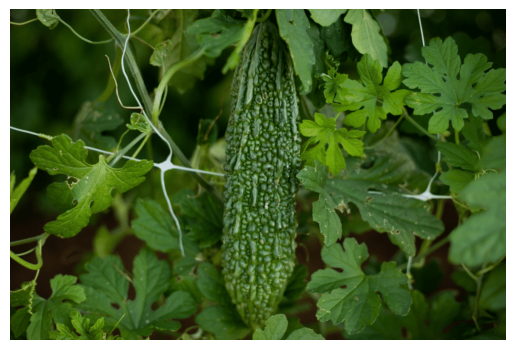

1/1 [==============================] - 0s 282ms/step
Predicted Label: Ripe


In [9]:
import numpy as np
import warnings
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tkinter as tk
from tkinter import filedialog
warnings.filterwarnings("ignore", category=UserWarning, module="tensorflow")

# Load the trained model
model = load_model('bitter_gourd_classificationVGG16(4).h5')  # Change the path if necessary

# Define a function to predict the label of a single image
def predict_label(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize the image

    prediction = model.predict(img)
    class_indices = {0: 'Small', 1: 'Medium', 2: 'Ripe'}
    predicted_class = class_indices[np.argmax(prediction)]

    return predicted_class

# Example usage:
#image_path = 'small2.png' 
#img = mpimg.imread(img_path)
root = tk.Tk()
root.withdraw()  # Hide the main window


# Ask the user to select a file
image_path = filedialog.askopenfilename(title="Select an image file", filetypes=[("Image files", "*.jpg *.jpeg *.png")])


# Check if a file was selected
if image_path:
    # Load and display the selected image
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels and ticks
    plt.show()
else:
    print("No file selected.")

# Close the GUI window

predicted_label = predict_label(image_path)
print(f'Predicted Label: {predicted_label}')


Classify the bitter gourd image